In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

in_file = 'Data0322-1016.csv'
full_data = pd.read_csv(in_file)
full_data.head()

,people,starttime,comments,pageviews,negative,neutral,official,hot,new,reply,type
0,С̫����,20161016,1,30,0,1,0,0,0,0,communication
1,С̫����,20161016,1,13,0,1,0,0,1,0,communication
2,����ҽ��,20161016,5,53,1,0,0,0,0,1,communication
3,����С����,20161016,7,61,0,1,0,0,0,0,communication
4,����ҽ��,20161016,4,33,0,1,0,0,0,0,help


In [2]:
full_data['people']=full_data['people'].apply(lambda x:len(x))
full_data.describe()

,people,starttime,comments,pageviews,negative,neutral,official,hot,reply
count,396.000000,3.960000e+02,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000
mean,7.595960,2.016088e+07,2.762626,230.772727,0.037879,0.941919,0.318182,0.214646,0.474747
std,2.752837,2.027176e+02,6.136359,448.592430,0.191145,0.234192,0.466360,0.411096,0.499994
min,3.000000,2.016032e+07,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,2.016081e+07,0.000000,36.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,8.000000,2.016100e+07,1.000000,90.500000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,10.000000,2.016101e+07,3.000000,226.250000,0.000000,1.000000,1.000000,0.000000,1.000000
max,15.000000,2.016102e+07,67.000000,4706.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
full_data['starttime']=full_data['starttime'].apply(lambda x:(x-20160000))

In [4]:
full_data.head()

,people,starttime,comments,pageviews,negative,neutral,official,hot,new,reply,type
0,8,1016,1,30,0,1,0,0,0,0,communication
1,8,1016,1,13,0,1,0,0,1,0,communication
2,8,1016,5,53,1,0,0,0,0,1,communication
3,10,1016,7,61,0,1,0,0,0,0,communication
4,8,1016,4,33,0,1,0,0,0,0,help


In [5]:
act_data=full_data[(full_data['starttime']>=923)&(full_data['starttime']<=1012)]
act_data.describe()

,people,starttime,comments,pageviews,negative,neutral,official,hot,reply
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,8.372000,994.660000,2.732000,159.516000,0.040000,0.932000,0.160000,0.228000,0.540000
std,2.620895,29.139196,7.129058,438.631911,0.196352,0.252251,0.367341,0.420384,0.499397
min,3.000000,923.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1001.000000,0.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,8.000000,1009.000000,1.000000,51.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,10.000000,1010.000000,2.000000,123.250000,0.000000,1.000000,0.000000,0.000000,1.000000
max,15.000000,1012.000000,67.000000,4706.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
positive_data=act_data[(act_data['negative']==0)&(act_data['neutral']==0)]
positive_data

,people,starttime,comments,pageviews,negative,neutral,official,hot,new,reply,type
46,6,1011,1,25,0,0,0,0,1,1,communication
53,10,1010,1,8,0,0,0,0,0,1,communication
55,7,1010,1,8,0,0,0,0,1,1,communication
73,9,1010,1,65,0,0,1,0,1,1,communication
116,10,1009,1,6,0,0,0,0,1,1,communication
127,3,1009,1,8,0,0,0,0,1,1,raiders
198,6,1001,1,35,0,0,0,0,1,0,communication


In [7]:
negative_data=act_data[(act_data['negative']==1)]
negative_data

,people,starttime,comments,pageviews,negative,neutral,official,hot,new,reply,type
36,15,1011,5,91,1,0,0,0,0,1,advice
43,10,1011,2,27,1,0,0,0,0,1,communication
77,10,1010,6,110,1,0,0,0,0,1,help
154,8,1006,3,20,1,0,0,0,1,0,help
160,8,1005,4,15,1,0,0,0,1,1,help
163,9,1004,3,64,1,0,0,0,0,1,help
168,8,1003,2,18,1,0,0,0,1,1,communication
193,10,1001,0,66,1,0,0,0,1,0,help
199,10,1001,0,37,1,0,0,0,0,0,communication
258,4,924,2,237,1,0,0,0,0,0,none


In [8]:
print act_data.shape[0]
print positive_data.shape[0]
print negative_data.shape[0]

250
7
10


In [9]:
emotion_data=pd.DataFrame({'positive':[7],'negative':[10],'neutral':[233]})
emotion_data

,negative,neutral,positive
0,10,233,7


Populating the interactive namespace from numpy and matplotlib


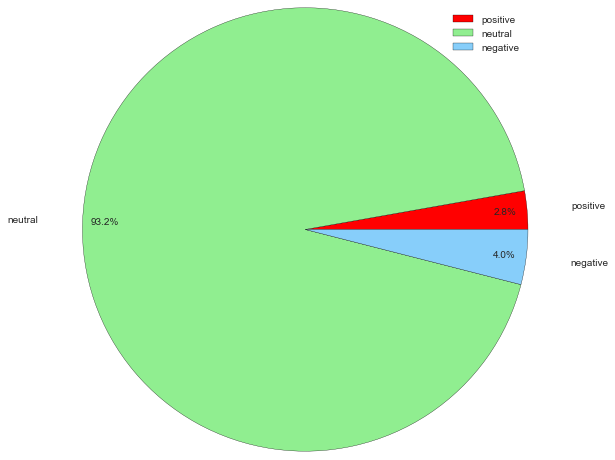

In [10]:
from matplotlib import pyplot as plt 
%pylab inline
#调节图形大小，宽，高
plt.figure(figsize=(8,8))
#定义饼状图的标签，标签是列表
labels = [u'positive',u'neutral',u'negative']
#每个标签占多大，会自动去算百分比
sizes = [7,233,10]
colors = ['red','lightgreen','lightskyblue']
#将某部分爆炸出来， 使用括号，将第一块分割出来，数值的大小是分割出来的与其他两块的间隙
explode = (0,0,0)

patches,l_text,p_text = plt.pie(sizes,explode=explode,labels=labels,colors=colors,
                                labeldistance = 1.2,autopct = '%1.1f%%',shadow = False,
                                startangle = 0,pctdistance = 0.9)

#labeldistance，文本的位置离远点有多远，1.1指1.1倍半径的位置
#autopct，圆里面的文本格式，%3.1f%%表示小数有三位，整数有一位的浮点数
#shadow，饼是否有阴影
#startangle，起始角度，0，表示从0开始逆时针转，为第一块。一般选择从90度开始比较好看
#pctdistance，百分比的text离圆心的距离
#patches, l_texts, p_texts，为了得到饼图的返回值，p_texts饼图内部文本的，l_texts饼图外label的文本

#改变文本的大小
#方法是把每一个text遍历。调用set_size方法设置它的属性
for t in l_text:
    t.set_size=(100)
for t in p_text:
    t.set_size=(80)
# 设置x，y轴刻度一致，这样饼图才能是圆的
plt.axis('equal')
plt.legend()
plt.show()

In [11]:
dir={}
for i in range(923,1013):#take care there can be changed
    result=act_data[act_data['starttime']==i]
    if result.shape[0] != 0:
        #print i,result.shape[0]
        dir[i]=result.shape[0]
dir

{923: 8,
 924: 4,
 925: 1,
 926: 2,
 927: 1,
 928: 15,
 929: 5,
 930: 2,
 1001: 48,
 1002: 11,
 1003: 7,
 1004: 4,
 1005: 4,
 1006: 5,
 1007: 4,
 1008: 1,
 1009: 61,
 1010: 34,
 1011: 22,
 1012: 11}

In [12]:
starttime=[]
amount=[]
for i in range(923,1013):#take care there can be changed
    result=act_data[act_data['starttime']==i]
    if result.shape[0] != 0:
        starttime.append(i)
        amount.append(result.shape[0])
data={'starttime':starttime,'amount':amount}
starttime_data=pd.DataFrame(data)
starttime_data

,amount,starttime
0,8,923
1,4,924
2,1,925
3,2,926
4,1,927
5,15,928
6,5,929
7,2,930
8,48,1001
9,11,1002


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['colors']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


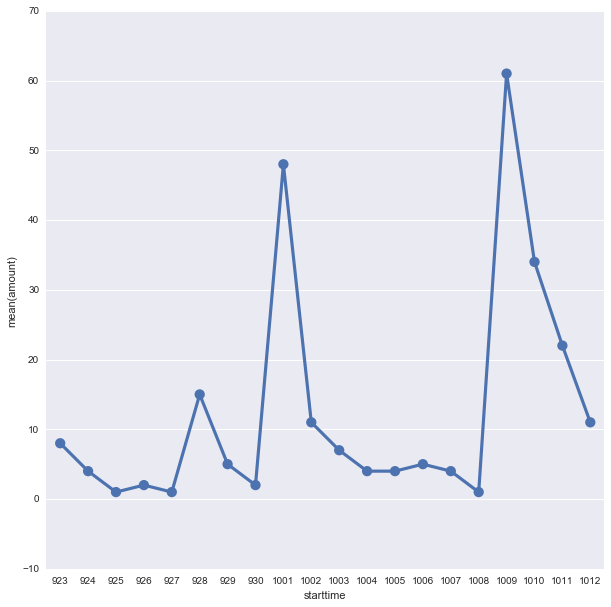

In [13]:
import matplotlib.pyplot as plt
%pylab inline
plt.figure(figsize=(10,10))
sns.pointplot(x='starttime',y='amount',data=starttime_data)

Populating the interactive namespace from numpy and matplotlib


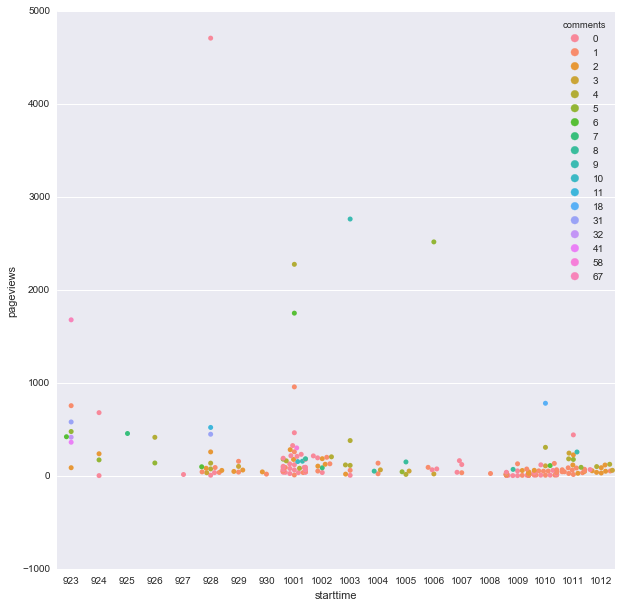

In [14]:
import matplotlib.pyplot as plt
%pylab inline
plt.figure(figsize=(10,10))
sns.swarmplot(x='starttime',y='pageviews',hue='comments',data=act_data)

In [15]:
reply_data=act_data[act_data['reply']==1]
reply_data.shape[0]

135

Populating the interactive namespace from numpy and matplotlib


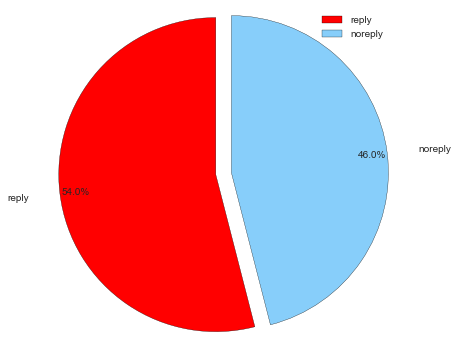

In [16]:
from matplotlib import pyplot as plt 
%pylab inline
plt.figure(figsize=(6,6))
labels = [u'reply',u'noreply']

sizes = [135,115]
colors = ['red','lightskyblue']

explode = (0.1,0)

patches,l_text,p_text = plt.pie(sizes,explode=explode,labels=labels,colors=colors,
                                labeldistance = 1.2,autopct = '%1.1f%%',shadow = False,
                                startangle = 90,pctdistance = 0.9)

for t in l_text:
    t.set_size=(80)
for t in p_text:
    t.set_size=(80)
plt.axis('equal')
plt.legend()
plt.show()

In [17]:
result=act_data[act_data['starttime']==1012]
result1=result['pageviews']
s=0
for i in result1:
    s+=i
print s

774


In [18]:
starttime=[]
pageviews=[]
for i in range(923,1013):#take care there can be changed
    result=act_data[act_data['starttime']==i]
    result1=result['pageviews']
    s=0
    if result.shape[0] != 0:
        starttime.append(i)
        for j in result1:
            s+=j
        pageviews.append(s)
data={'starttime':starttime,'pageviews':pageviews}
pageviews_data=pd.DataFrame(data)
pageviews_data

,pageviews,starttime
0,4769,923
1,1089,924
2,460,925
3,552,926
4,16,927
5,6616,928
6,406,929
7,60,930
8,10431,1001
9,1523,1002


Populating the interactive namespace from numpy and matplotlib


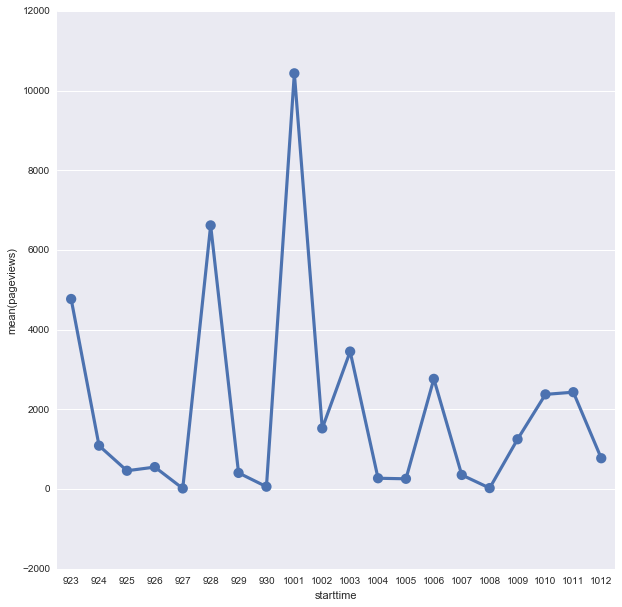

In [43]:
import matplotlib.pyplot as plt
%pylab inline
plt.figure(figsize=(10,10))
sns.pointplot(x='starttime',y='pageviews',data=pageviews_data)

In [25]:
new_data=act_data[act_data['new']=='1']
new_data.shape[0]

142

In [31]:
newreply_data=new_data[new_data['reply']==1]
newreply_data.shape[0]

65

Populating the interactive namespace from numpy and matplotlib


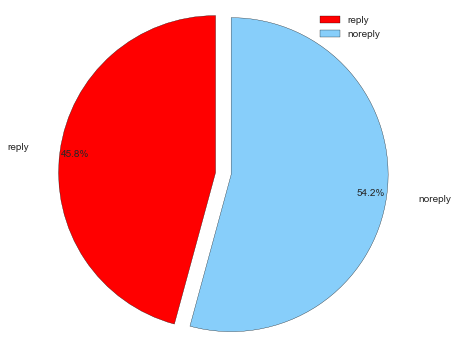

In [32]:
from matplotlib import pyplot as plt 
%pylab inline
plt.figure(figsize=(6,6))
labels = [u'reply',u'noreply']

sizes = [65,77]
colors = ['red','lightskyblue']

explode = (0.1,0)

patches,l_text,p_text = plt.pie(sizes,explode=explode,labels=labels,colors=colors,
                                labeldistance = 1.2,autopct = '%1.1f%%',shadow = False,
                                startangle = 90,pctdistance = 0.9)

for t in l_text:
    t.set_size=(80)
for t in p_text:
    t.set_size=(80)
plt.axis('equal')
plt.legend()
plt.show()

In [34]:
communication_data=act_data[act_data['type']=='communication']
communication_data.shape[0]

51

In [36]:
raiders_data=act_data[act_data['type']=='raiders']
raiders_data.shape[0]

133

In [37]:
help_data=act_data[act_data['type']=='help']
help_data.shape[0]

18

In [38]:
advice_data=act_data[act_data['type']=='advice']
advice_data.shape[0]

12

In [39]:
announcement_data=act_data[act_data['type']=='announcement']
announcement_data.shape[0]

6

In [40]:
activity_data=act_data[act_data['type']=='activity']
activity_data.shape[0]

9

In [42]:
others_data=act_data[(act_data['type']!='help')&
                     (act_data['type']!='advice')&
                     (act_data['type']!='raiders')&
                     (act_data['type']!='activity')&
                     (act_data['type']!='announcement')&
                     (act_data['type']!='communication')
                    ]
others_data.shape[0]

21

Populating the interactive namespace from numpy and matplotlib


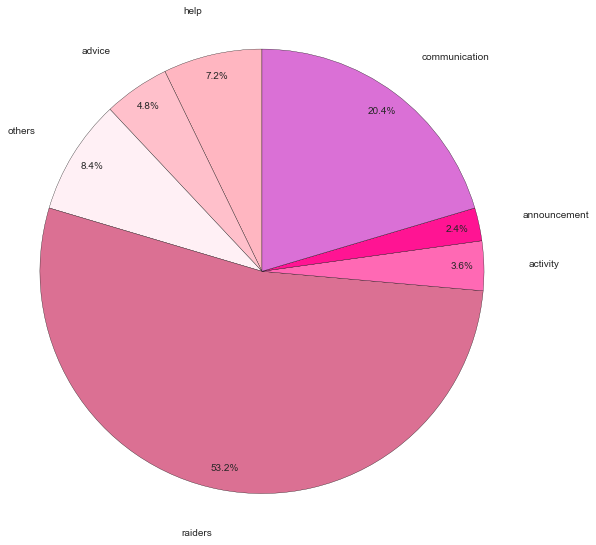

In [61]:
from matplotlib import pyplot as plt 
%pylab inline
plt.figure(figsize=(8,8))
labels = [u'help',u'advice',u'others',u'raiders',u'activity',u'announcement',u'communication']

sizes = [18,12,21,133,9,6,51]
colors = ['#FFB6C1','#FFC0CB','#FFF0F5','#DB7093','#FF69B4','#FF1493','#DA70D6']

explode = (0,0,0,0,0,0,0)

patches,l_text,p_text = plt.pie(sizes,explode=explode,labels=labels,colors=colors,
                                labeldistance = 1.2,autopct = '%1.1f%%',shadow = False,
                                startangle = 90,pctdistance = 0.9)

for t in l_text:
    t.set_size=(80)
for t in p_text:
    t.set_size=(80)
plt.axis('equal')
#plt.legend(loc='lower center')
plt.show()